<a href="https://colab.research.google.com/github/jecs89/LearningEveryDay/blob/master/ML/ML4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1>Study of Machine Learning Algorithms for Diabetes Prediction</h1>**

In [1]:
###Nome: Josimar Edinson Chire Saire
###NUSP: 10569111

###Source data: https://www.kaggle.com/uciml/pima-indians-diabetes-database
###Paper: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2245318/pdf/procascamc00018-0276.pdf

In [2]:
# Those input variables were:
# 1.Number of times pregnant
# 2.Plasma Glucose Concentration at 2 Hours in an Oral Glucose ToleranceTest(GTIT)
# 3.Diastolic Blood Pressure(mm Hg)
# 4.Triceps Skin Fold Thickness(mm)
# 5.2-Hour Serum Insulin (Uh/ml)
# 6.Body Mass Index(Weight in kg/(Height in m))
# 7.Diabetes Pedigree Function
# 8.Age(years)

# Target. If the patient has (1) or not diabetes (0)

In [3]:
import random
random.seed(42)

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Imported packages for DataFrame manipulation, plotting graphics and scaling
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

#Reading dataset
df = pd.read_csv('diabetes.csv', delimiter=',')
df.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'target']

In [ ]:
#General statistics
df.drop('target', axis=1).describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [5]:
#Droping samples with 0 values in Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction
df_tmp = df.copy()
print(df_tmp['target'].value_counts())
for column in df.columns[1:len(df.columns)-1]:
  print(df_tmp[df_tmp[column] == 0]['target'].value_counts())
  df_tmp = df_tmp[ df_tmp[column] != 0 ]
print(df_tmp['target'].value_counts())

df = df_tmp.copy()

0    500
1    268
Name: target, dtype: int64
0    3
1    2
Name: target, dtype: int64
0    19
1    16
Name: target, dtype: int64
0    121
1     73
Name: target, dtype: int64
0    94
1    47
Name: target, dtype: int64
0    1
Name: target, dtype: int64
Series([], Name: target, dtype: int64)
Series([], Name: target, dtype: int64)
0    262
1    130
Name: target, dtype: int64


In [11]:
#Checking nan values
df[~df.isna()]['target'].value_counts()

0    262
1    130
Name: target, dtype: int64

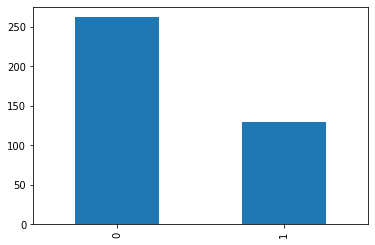

In [12]:
#Check if classes are balanced 
df['target'].value_counts().plot(kind='bar')

In [13]:
##Sampling artificial data to have balanced dataset
from collections import Counter
from imblearn.over_sampling import SMOTE

print(df['target'].value_counts())
X = df.drop('target', axis=1).values
y = df['target']
print(X.shape, y.shape)

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y )
# print(X_res.shape, y_res.shape)

n_dataset = np.zeros([Counter(y_res)[0]*2, X.shape[1]+1])
# print(n_dataset.shape)

n_dataset[:, 0:n_dataset.shape[1]-1] = X_res
n_dataset[:, n_dataset.shape[1]-1] = y_res

dataset = pd.DataFrame(data=n_dataset, columns=df.columns)
print(dataset['target'].value_counts())

data = dataset

0    262
1    130
Name: target, dtype: int64
(392, 8) (392,)
1.0    262
0.0    262
Name: target, dtype: int64


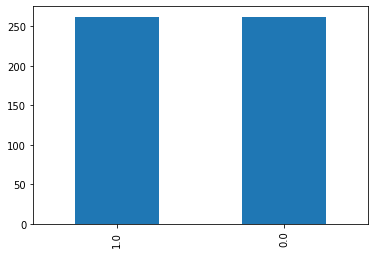

In [14]:
#Verification of the number of elements per class
data['target'].value_counts().plot(kind='bar')
data.to_csv('balanced_diabetes.csv', sep=',', encoding='utf-8', index=False)

In [15]:
#Import for machine learning algorithsm comparison
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
import xgboost
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import StratifiedKFold

import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000, formatter=dict(float=lambda x: "%.4g" % x))

In [16]:
classifiers = [
    ("Gausssian-NB", GaussianNB()),
    ("Logistic-Regression", LogisticRegression()),
    ("Decision-Tree", DecisionTreeClassifier(criterion='gini', max_depth=7)),
    ("MLPClassifier", MLPClassifier(alpha=1, max_iter=1000)), 
    ("Xgboost", XGBClassifier()),
    ("RF", RandomForestClassifier(n_estimators=10, max_depth=2, random_state=0)),
    ("Bagging", BaggingClassifier(DecisionTreeClassifier())),
    # ("Gradient", GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)) 
    ]

In [18]:
# Initial Comparison of algorithms of Machine Learning using Accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, f1_score 

    
X = data[ data.columns[0:len(data.columns)-1 ] ].values
y = data[ data.columns[len(data.columns)-1 ] ].values

metrics_recall = []
metrics_f1 = []

for name, clf in classifiers:
    print(name)
    skf = StratifiedKFold(n_splits=10)
    skf.get_n_splits(X, y)
    metric_recall = []
    metric_f1 = []
            
    for train_index, test_index in skf.split(X,y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        #Scaling of data        
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)

        clf.fit(X_train, y_train)
        
        y_pred = clf.predict(X_test)
        # score = metrics.accuracy_score(y_test, y_pred)
        metric_recall.append(recall_score(y_test, y_pred, average='micro'))
        metric_f1.append(f1_score(y_test, y_pred, average='micro'))
    metrics_recall.append(np.array(metric_recall))
    metrics_f1.append(np.array(metric_f1))

Gausssian-NB
Logistic-Regression
Decision-Tree
MLPClassifier
Xgboost
RF
Bagging


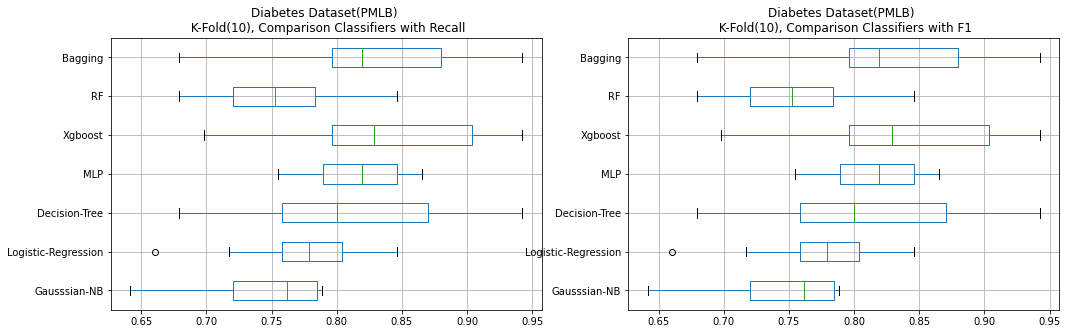

In [22]:
#Visualization of results considering accuracy, then the best median is Bagging
fig = plt.figure( figsize=(17,5) )
plt.subplot(1,2,1)
pd_scores = pd.DataFrame(np.array(metrics_recall).T)
pd_scores.columns = ['Gausssian-NB','Logistic-Regression','Decision-Tree','MLP','Xgboost', 'RF','Bagging']
pd_scores.boxplot(vert=False)
plt.title('Diabetes Dataset(PMLB) \n K-Fold(10), Comparison Classifiers with Recall')
plt.subplot(1,2,2)
pd_scores = pd.DataFrame(np.array(metrics_f1).T)
pd_scores.columns = ['Gausssian-NB','Logistic-Regression','Decision-Tree','MLP','Xgboost', 'RF','Bagging']
pd_scores.boxplot(vert=False)
plt.title('Diabetes Dataset(PMLB) \n K-Fold(10), Comparison Classifiers with F1')
plt.show()

In [23]:
!pip install Boruta

     |████████████████████████████████| 56 kB 3.1 MB/s 


In [24]:
#Reading dataset
data = pd.read_csv('balanced_diabetes.csv', delimiter=',')
# data = df.drop(df.columns[0], axis=1)

In [27]:
#Selection of features using Boruta
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

# load X and y
# NOTE BorutaPy accepts numpy arrays only, hence the .values attribute
X = data[ data.columns[0:len(data.columns)-2 ] ].values
y = data[ data.columns[len(data.columns)-1 ] ].values
y = y.ravel()

# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
#### It was necessary to force the depth to 10, because 6 was not enough
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=15)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', random_state=1)

# find all relevant features - 5 features should be selected
feat_selector.fit(X, y)

# check selected features - first 5 features are selected
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X)

In [29]:
#BloodPressure wasnt select after increasing depth to 15
print(feat_selector.ranking_)
print(data.columns)

[1 1 2 1 1 1 1]
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'target'],
      dtype='object')


In [32]:
##Comparison of algorithms considering selected features of Boruta
X = X_filtered
y = data[ data.columns[len(data.columns)-1 ] ].values

metrics_recall_ = []
metrics_f1_ = []

for name, clf in classifiers:
    print(name)
    skf = StratifiedKFold(n_splits=10)
    skf.get_n_splits(X, y)
    metric_recall = []
    metric_f1 = []
            
    for train_index, test_index in skf.split(X,y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        #Scaling of data        
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)

        clf.fit(X_train, y_train)
        
        y_pred = clf.predict(X_test)
        # score = metrics.accuracy_score(y_test, y_pred)
        metric_recall.append(recall_score(y_test, y_pred, average='micro'))
        metric_f1.append(f1_score(y_test, y_pred, average='micro'))
    metrics_recall_.append(np.array(metric_recall))
    metrics_f1_.append(np.array(metric_f1))

Gausssian-NB
Logistic-Regression
Decision-Tree
MLPClassifier
Xgboost
RF
Bagging


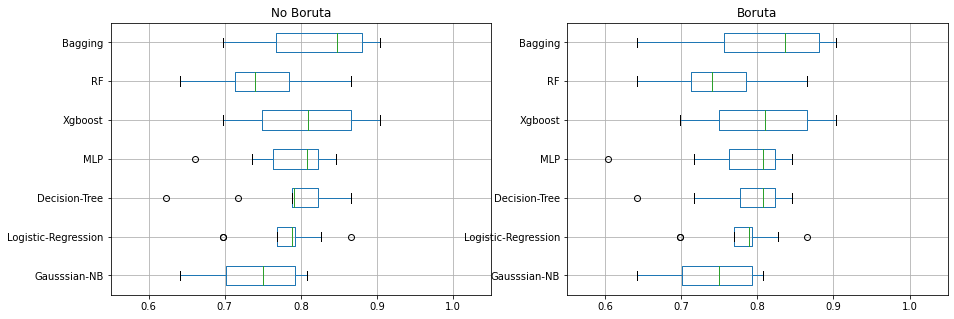

In [34]:
#There is a litle difference between both, with and without Boruta, if we consider median.
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
pd_scores = pd.DataFrame(np.array(metrics_recall).T)
pd_scores.columns = ['Gausssian-NB','Logistic-Regression','Decision-Tree','MLP','Xgboost', 'RF','Bagging']
pd_scores.boxplot(vert=False)
plt.axis([0.55,1.05, 0.5, 7.5])
plt.title('No Boruta')
plt.subplot(1,2,2)
pd_scores = pd.DataFrame(np.array(metrics_recall_).T)
pd_scores.columns = ['Gausssian-NB','Logistic-Regression','Decision-Tree','MLP','Xgboost', 'RF','Bagging']
pd_scores.boxplot(vert=False)
plt.axis([0.55,1.05, 0.5, 7.5])
plt.title('Boruta')
plt.show()

In [126]:
#Considering the table there is not a meningful diference betweeen Boruta feature selection
metrics = [ metrics_recall, metrics_recall_, metrics_f1, metrics_f1_]
names = ['Recall No Boruta', 'Recall Boruta', 'F1 No Boruta', 'F1 Boruta']
table = []
for metric, name in zip(metrics, names):
  pd_scores = pd.DataFrame(np.array(metric))
  pd_scores[name] = pd_scores.mean()
  pd_scores[name] = pd_scores[name].round(4).astype('str') + ' +/- ' +(pd_scores.std(axis=1).round(4).astype('str'))
  pd_scores.drop(pd_scores.columns[0:10], axis=1, inplace=True)
  table.append(pd_scores)
pd_table = pd.concat(table, axis=1)
pd_table.index = np.array(classifiers)[:,0]
pd_table['Diff Recall %'] = ((pd_table[pd_table.columns[0]].str[0:4].astype(float) - pd_table[pd_table.columns[1]].str[0:4].astype(float)) / pd_table[pd_table.columns[0]].str[0:4].astype(float)*100).round(4)
pd_table['Diff F1 %'] = ((pd_table[pd_table.columns[2]].str[0:4].astype(float) - pd_table[pd_table.columns[3]].str[0:4].astype(float)) / pd_table[pd_table.columns[2]].str[0:4].astype(float)*100).round(4)
pd_table

,Recall No Boruta,Recall Boruta,F1 No Boruta,F1 Boruta,Diff Recall %,Diff F1 %
Gausssian-NB,0.6873 +/- 0.0574,0.6739 +/- 0.0587,0.6873 +/- 0.0574,0.6739 +/- 0.0587,1.4706,1.4706
Logistic-Regression,0.7574 +/- 0.049,0.7574 +/- 0.049,0.7574 +/- 0.049,0.7574 +/- 0.049,0.0000,0.0000
Decision-Tree,0.7062 +/- 0.0702,0.7062 +/- 0.0649,0.7062 +/- 0.0702,0.7062 +/- 0.0649,0.0000,0.0000
MLPClassifier,0.7898 +/- 0.0545,0.7951 +/- 0.0703,0.7898 +/- 0.0545,0.7951 +/- 0.0703,-1.2821,-1.2821
Xgboost,0.8297 +/- 0.0674,0.8159 +/- 0.0672,0.8297 +/- 0.0674,0.8159 +/- 0.0672,1.2195,1.2195
RF,0.8022 +/- 0.0665,0.7995 +/- 0.0663,0.8022 +/- 0.0665,0.7995 +/- 0.0663,1.2500,1.2500
Bagging,0.8104 +/- 0.0733,0.8077 +/- 0.0818,0.8104 +/- 0.0733,0.8077 +/- 0.0818,1.2346,1.2346


In [73]:
#To plot curve roc using cross validation is necessary to upgrade sklearn
!pip install --upgrade scikit-learn

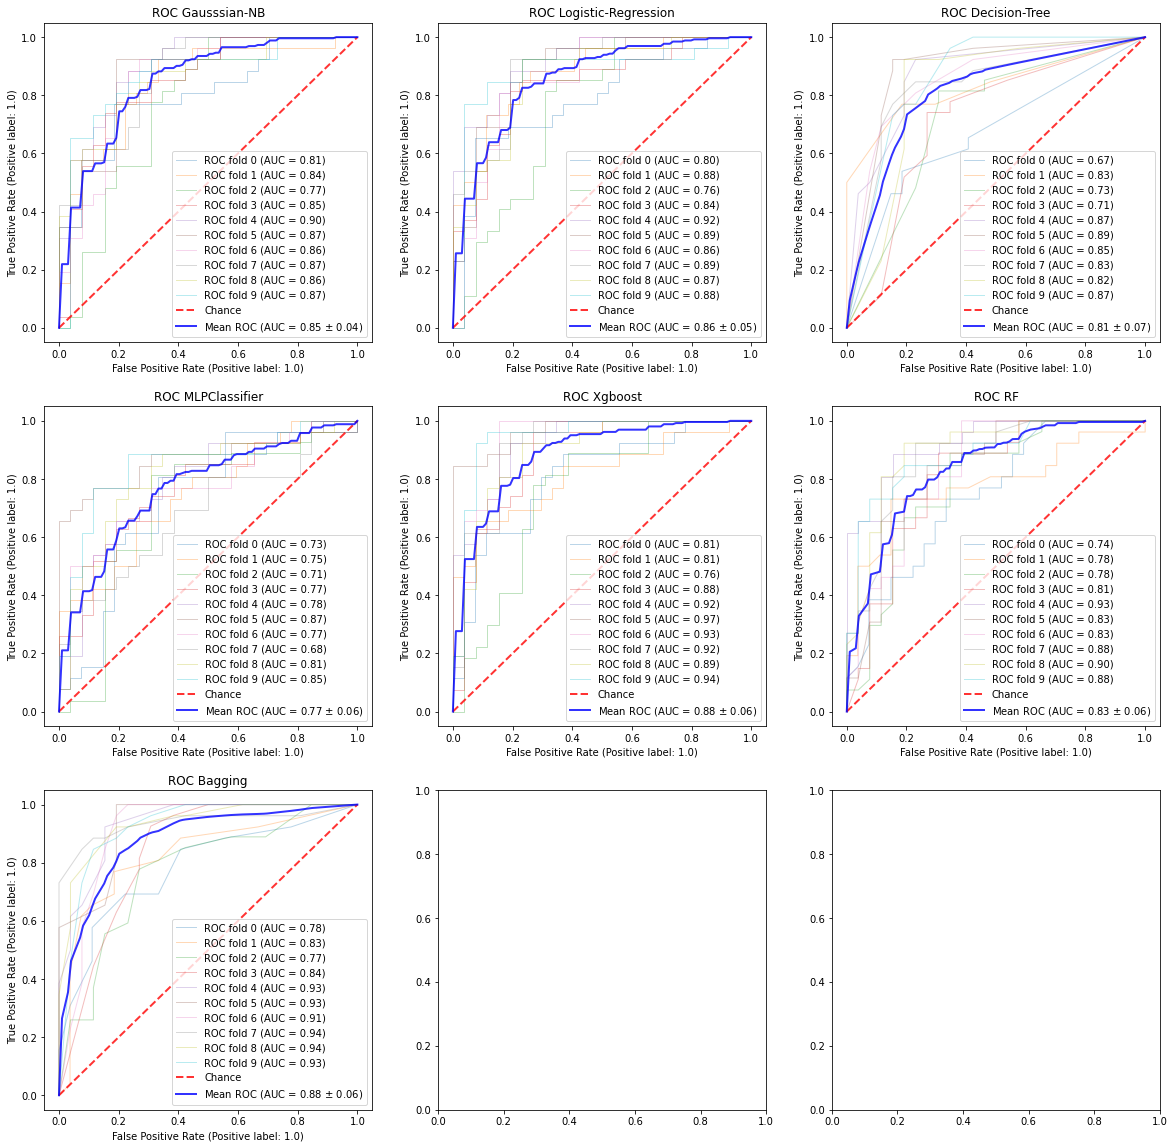

In [77]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation

# Import some data to play with
X = X_filtered
y = data[ data.columns[len(data.columns)-1 ] ].values

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
# cv = StratifiedKFold(n_splits=6)
cv = StratifiedKFold(n_splits=10)

# classifier = svm.SVC(kernel="linear", probability=True, random_state=random_state)



fig, axs = plt.subplots(3,3, figsize=(20,20))
a = 0
b = 0

mean_fprs = []
mean_tprs = []
mean_aucs = []
std_aucs  = []

for name, classifier in classifiers:

  tprs = []
  aucs = []
  mean_fpr = np.linspace(0, 1, 100)

  ax = axs[a,b]
  for i, (train, test) in enumerate(cv.split(X, y)):
      classifier.fit(X[train], y[train])
      viz = RocCurveDisplay.from_estimator(
          classifier,
          X[test],
          y[test],
          name="ROC fold {}".format(i),
          alpha=0.3,
          lw=1,
          ax=ax,
      )
      interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
      interp_tpr[0] = 0.0
      tprs.append(interp_tpr)
      aucs.append(viz.roc_auc)

  ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  mean_auc = auc(mean_fpr, mean_tpr)
  std_auc = np.std(aucs)
  ax.plot(
      mean_fpr,
      mean_tpr,
      color="b",
      label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
      lw=2,
      alpha=0.8,
  )
  mean_fprs.append(mean_fpr)
  mean_tprs.append(mean_tpr)
  mean_aucs.append(mean_auc)
  std_aucs.append(std_auc)

  std_tpr = np.std(tprs, axis=0)
  tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
  tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
  ax.set(
      xlim=[-0.05, 1.05],
      ylim=[-0.05, 1.05],
      title="ROC "+ name,
  )
  ax.legend(loc="lower right")
  b += 1
  if b%3 == 0:
    b = 0
    a += 1
plt.show()

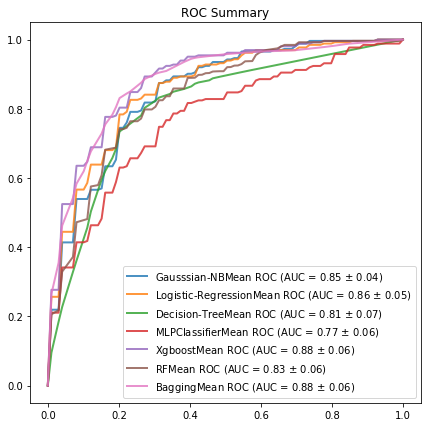

In [156]:
fig1, axs_global = plt.subplots(1,1, figsize=(7,7))
import seaborn as sns
palette = sns.color_palette(None, 50)
i = 0

for mean_fpr, mean_tpr, mean_auc, std_auc in zip(mean_fprs, mean_tprs, mean_aucs, std_aucs):
  label = r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc)
  axs_global.plot(
      mean_fpr,
      mean_tpr,
      color=palette[i],
      label= np.array(classifiers)[:,0][i] + label,
      lw=2,
      alpha=0.8,
  )
  axs_global.set(
      xlim=[-0.05, 1.05],
      ylim=[-0.05, 1.05],
      title="ROC Summary",
  )
  axs_global.legend(loc="lower right")
  i+= 1
plt.show()
fig1.savefig('roc.png', bbox_inches = 'tight', pad_inches = 0)

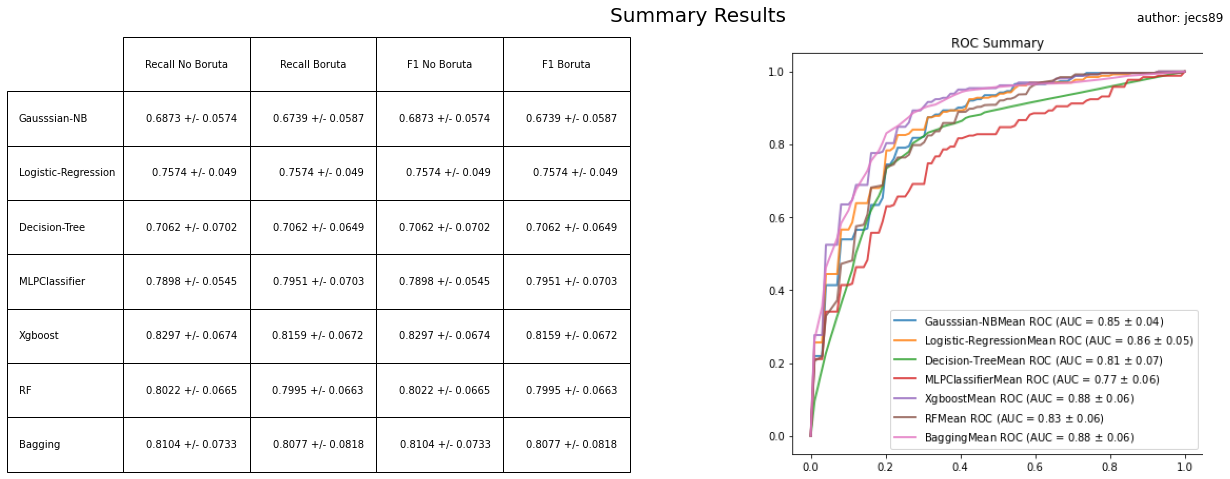

In [188]:
import imageio as io

pd_table1 = pd_table.drop(pd_table.columns[4:6], axis=1)

fig = plt.figure(figsize=(20,8))

ax2 = fig.add_subplot(121)
font_size=10
bbox=[0, 0, 1, 1]
ax2.axis('off')

ax1 = fig.add_subplot(122)
ax1.text(-150,-15, 'Summary Results', fontsize=20)
ax1.text(350,-15, 'author: jecs89', fontsize=12)
im = io.imread('roc.png')
ax1.imshow(im)
ax1.axis('off')

mpl_table = ax2.table(cellText = pd_table1.values, rowLabels = pd_table1.index, bbox=bbox, colLabels=pd_table1.columns)
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)